# Deep Learning Model for MNIST Data Set with KERAS
In diesem Notebook erstellen wir ein erstes Deep Learning Model für den MNIST Data Set.

## LOADING PACKAGES

In [24]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

import matplotlib
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

## LOADING DATA

In [25]:
# import dataset
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [26]:
print("Shape x_train: {}".format(x_train.shape))
print("Shape x_test: {}".format(x_test.shape))

Shape x_train: (60000, 28, 28)
Shape x_test: (10000, 28, 28)


## Data Visualisation

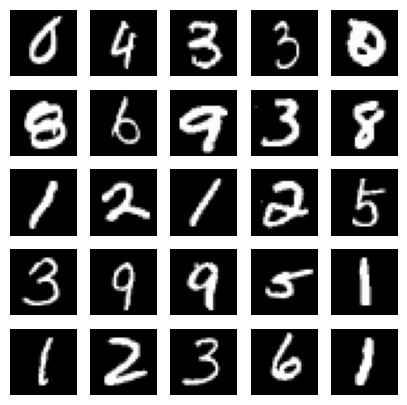

In [27]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

## Pre-Processing a data
### Reshaping the values

In [28]:
x_train = x_train.reshape((60000,28*28))
x_test = x_test.reshape((10000,28*28))

In [29]:
print("Shape x_train: {}".format(x_train.shape))
print("Shape x_test: {}".format(x_test.shape))

Shape x_train: (60000, 784)
Shape x_test: (10000, 784)


### Scaling the values

In [30]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [31]:
x_train[0:5,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Forming the output variables

In [32]:
# save each number as one-hot category
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [33]:
y_train[0:5,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Model
### Fixing the structure of the model

In [34]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(64,activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/Users/yhutter/GitRepos/fhgr-dl/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

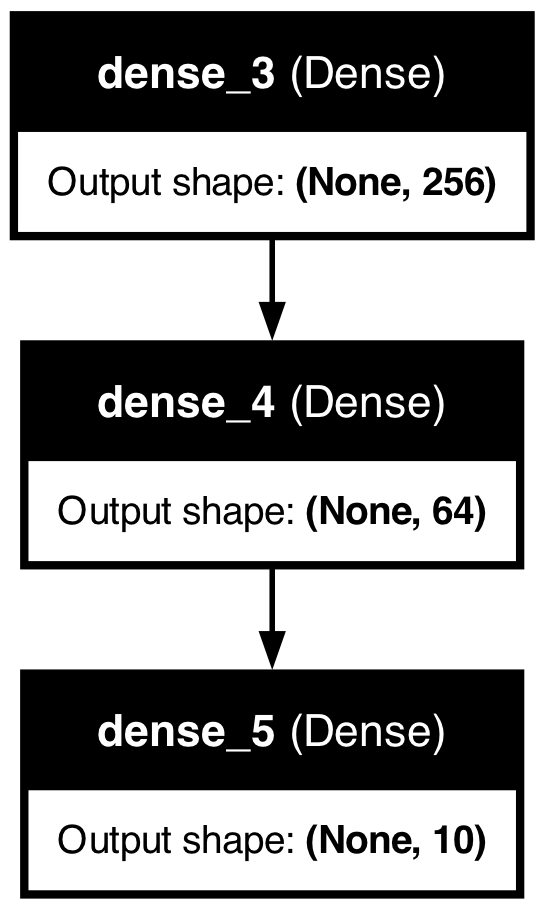

In [36]:
# Architektur anzeigen
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)
# Beim None kommt die Batch-Size dann rein

### Compiling the model

In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Training the model

In [38]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128,validation_split=0.10)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8370 - loss: 0.5708 - val_accuracy: 0.9673 - val_loss: 0.1187
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9641 - loss: 0.1225 - val_accuracy: 0.9725 - val_loss: 0.0978
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9766 - loss: 0.0772 - val_accuracy: 0.9773 - val_loss: 0.0802
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9849 - loss: 0.0512 - val_accuracy: 0.9782 - val_loss: 0.0762
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9882 - loss: 0.0409 - val_accuracy: 0.9773 - val_loss: 0.0763
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9910 - loss: 0.0308 - val_accuracy: 0.9800 - val_loss: 0.0731
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9935 - loss: 0.0222 - val_accuracy: 0.9817 - val_loss: 0.0685
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9950 - loss: 0.0173 - val_accuracy: 0.

In [18]:
history.history['accuracy'][19]

0.9995740652084351

### Evaluating the model performance


Accuracy during Training :
------------------------------------


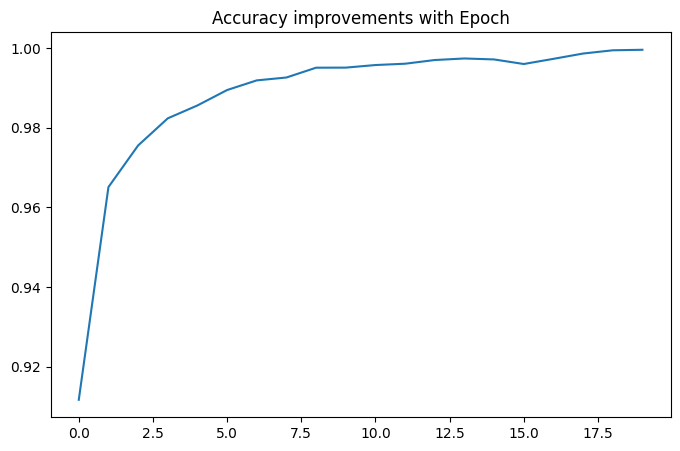

In [22]:
print("\nAccuracy during Training :\n------------------------------------")

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()


In [23]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(x_test,y_test)


Evaluation against Test Dataset :
------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.9742 - loss: 0.1206


[0.09221642464399338, 0.9807000160217285]

## REFERENCES
Francois Chollet (2018), Deep Learning with Python, Manning.
Kumaran Ponnambalam (2022), Deep Learning: Model Optimization and Tuning, LinkedIn Learning.